In [3]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [1]:
pwd

'C:\\Users\\sachin.rathi\\Machine learning\\Data_Practice\\Advance Analytics course\\Telematics\\telematics-master\\telematics-master'

In [203]:
df2 = pd.read_csv('feature_outputs/driver_features.csv')
df2 = df2.drop(['index'], axis=1)


#Map Score value for multinominal logistic regression
df2['target'] = df2['score'].apply(lambda x : 1 if (x >= 0.0) and (x <= 6.0) else (2 if (x > 6.0 and x <= 8.0) else 3))
df2['target'] = df2['target'].astype('object')

df2.head()

,max_speed,max_rotation,max_acc,avg_acc,avg_rotation,avg_speed,min_acc,min_speed,min_rotation,acc_roll_angle,acc_pitch_angle,score,target
0,1.112,3.666944,0.774753,0.341284,0.538582,0.8340,0.137298,0.556,0.057296,-3.791742,-2.157257,8.9,3
1,1.112,6.130672,0.774753,0.331477,1.145920,0.8618,0.098070,0.556,0.057296,5.184349,0.556679,8.9,3
2,1.112,6.130672,0.774753,0.352071,1.736069,0.8896,0.098070,0.556,0.057296,9.335799,-2.366690,8.9,3
3,1.390,10.542464,0.774753,0.355013,2.784586,0.9730,0.098070,0.556,0.057296,6.290228,-2.373949,8.9,3
4,1.390,10.542464,0.774753,0.371685,2.853341,1.0286,0.098070,0.556,0.057296,14.685577,-3.300141,8.9,3


In [204]:
X =df2.iloc[:,0:11]
Y= df2[['target']]


df2['target'].value_counts()

2    44491
3    25826
1    21283
Name: target, dtype: int64

In [140]:
X.head()

,max_speed,max_rotation,max_acc,avg_acc,avg_rotation,avg_speed,min_acc,min_speed,min_rotation,acc_roll_angle,acc_pitch_angle
0,1.112,3.666944,0.774753,0.341284,0.538582,0.8340,0.137298,0.556,0.057296,-3.791742,-2.157257
1,1.112,6.130672,0.774753,0.331477,1.145920,0.8618,0.098070,0.556,0.057296,5.184349,0.556679
2,1.112,6.130672,0.774753,0.352071,1.736069,0.8896,0.098070,0.556,0.057296,9.335799,-2.366690
3,1.390,10.542464,0.774753,0.355013,2.784586,0.9730,0.098070,0.556,0.057296,6.290228,-2.373949
4,1.390,10.542464,0.774753,0.371685,2.853341,1.0286,0.098070,0.556,0.057296,14.685577,-3.300141


In [86]:
# # #Modeling
# X = df2.iloc[:, :11].values
# y = df2.iloc[:, 11].values



# for count in range(0,len(y)):
#     if (y[count] >= 0.0) and (y[count] <= 6.0):
#         y[count]=1
#     elif (y[count]) > 6.0 and (y[count] <= 8.0):
#         y[count]=2
#     else :
#         y[count]=3

# df2['score'].value_counts()

#### Logistic Regression 

In [205]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y,random_state = 0)

In [206]:
#Modeling

lr = LogisticRegression()
lr.fit(X_train, y_train)

# print(lr.coef_)
# print(lr.intercept_)

y_pred = lr.predict(X_test)



print(confusion_matrix(y_test, y_pred))
print('\n')
#Accuracy of the model
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))
print('\n')
print(classification_report(y_test, y_pred))

[[1289 2956   12]
 [ 676 6218 2004]
 [ 177 1838 3150]]


Accuracy of logistic regression classifier on test set: 0.58


              precision    recall  f1-score   support

           0       0.60      0.30      0.40      4257
           1       0.56      0.70      0.62      8898
           2       0.61      0.61      0.61      5165

    accuracy                           0.58     18320
   macro avg       0.59      0.54      0.55     18320
weighted avg       0.59      0.58      0.57     18320



# Extreme Gradient Boost

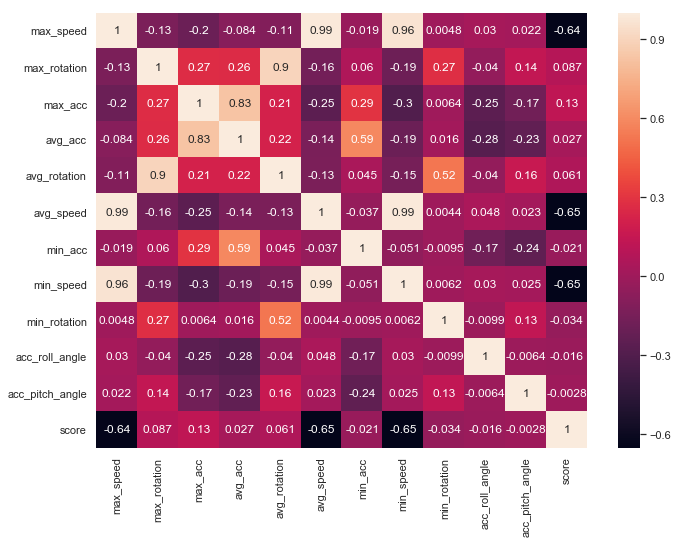

In [45]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11,8)})
Var_Corr = df2.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)



###### Find corelation strength between variables

In [46]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df2.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df2.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df2)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

In [47]:
print(get_top_abs_correlations(df2, 20))

avg_speed     min_speed          0.989712
max_speed     avg_speed          0.989512
              min_speed          0.962921
max_rotation  avg_rotation       0.900003
max_acc       avg_acc            0.826332
avg_speed     score              0.649998
min_speed     score              0.645653
max_speed     score              0.641453
avg_acc       min_acc            0.590391
avg_rotation  min_rotation       0.523658
max_acc       min_speed          0.298715
              min_acc            0.292860
avg_acc       acc_roll_angle     0.278580
max_rotation  min_rotation       0.274247
              max_acc            0.265717
              avg_acc            0.263218
max_acc       acc_roll_angle     0.253592
              avg_speed          0.250585
min_acc       acc_pitch_angle    0.243411
avg_acc       acc_pitch_angle    0.232228
dtype: float64


In [188]:
X =df2.iloc[:,0:11]
y= df2[['target']]



from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
y= lab_enc.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify=y, 
                                                    test_size=0.25, random_state=10)

In [189]:
df2.shape , X_train.shape , y_train.shape,X_test.shape,y_test.shape

((91600, 13), (68700, 11), (68700,), (22900, 11), (22900,))

In [190]:
import xgboost as xgb
model= xgb.XGBClassifier(random_state=1,learning_rate=0.01,objective= 'multi:softprob')

model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test,y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 5321     0     0]
 [    0 11123     0]
 [    0     0  6456]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5321
           1       1.00      1.00      1.00     11123
           2       1.00      1.00      1.00      6456

    accuracy                           1.00     22900
   macro avg       1.00      1.00      1.00     22900
weighted avg       1.00      1.00      1.00     22900



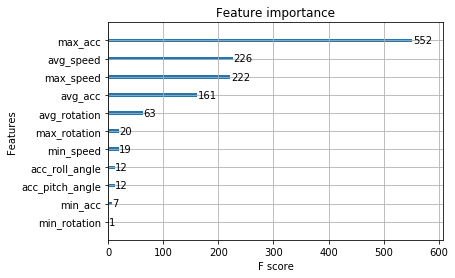

In [194]:
xgb.plot_importance(model)

#### With Selected columns

In [196]:
X_test = X_test[['max_acc','avg_acc','max_speed','avg_speed','avg_rotation','acc_roll_angle']]
X_train = X_train[['max_acc','avg_acc','max_speed','avg_speed','avg_rotation','acc_roll_angle']]

import xgboost as xgb
model= xgb.XGBClassifier(random_state=1,learning_rate=0.01,objective= 'multi:softprob')

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test,y_pred)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 5321     0     0]
 [    0 11123     0]
 [    0     0  6456]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5321
           1       1.00      1.00      1.00     11123
           2       1.00      1.00      1.00      6456

    accuracy                           1.00     22900
   macro avg       1.00      1.00      1.00     22900
weighted avg       1.00      1.00      1.00     22900



# LightGBM :LightGBM with all columns

In [165]:
import lightgbm as lgb

In [167]:
X =df2.iloc[:,0:11]
y= df2[['target']]



from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
y= lab_enc.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify=y, 
                                                    test_size=0.25, random_state=10)

In [172]:


l = lgb.LGBMClassifier(objective='multiclass')

In [173]:
l.fit(X_train, y_train)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31,
               objective='multiclass', random_state=None, reg_alpha=0.0,
               reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [174]:
y_pred_lightgbm = l.predict(X_test)

print(confusion_matrix(y_test, y_pred_lightgbm))
print(classification_report(y_test, y_pred_lightgbm))

[[ 5319     2     0]
 [    1 11121     1]
 [    0     1  6455]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5321
           1       1.00      1.00      1.00     11123
           2       1.00      1.00      1.00      6456

    accuracy                           1.00     22900
   macro avg       1.00      1.00      1.00     22900
weighted avg       1.00      1.00      1.00     22900



In [175]:
print(l.score(X_test,y_test))
print(l.score(X_train,y_train))

0.9997816593886463
1.0


In [176]:
accuracy_score(y_test,y_pred_lightgbm)

0.9997816593886463

#### LBM with Selected columns

In [135]:
# Remove Corelated variables ( Pearson Corelation)

In [180]:
X =df2.iloc[:,0:11]
y= df2[['target']]



from sklearn import preprocessing

lab_enc = preprocessing.LabelEncoder()
y= lab_enc.fit_transform(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    stratify=y, 
                                                    test_size=0.25, random_state=10)

X_test_selected = X_test[['max_acc','avg_acc','avg_speed','avg_rotation','acc_roll_angle','acc_pitch_angle']]
X_train_selected= X_train[['max_acc','avg_acc','avg_speed','avg_rotation','acc_roll_angle','acc_pitch_angle']]

lgb_selected = lgb.LGBMClassifier(objective='multiclass')

lgb_selected.fit(X_train_selected, y_train)

y_pred_lightgbm_selected = lgb_selected.predict(X_test_selected)


In [182]:

print(confusion_matrix(y_test, y_pred_lightgbm_selected))
print(classification_report(y_test, y_pred_lightgbm_selected))

[[ 5226    95     0]
 [   44 10730   349]
 [    0   141  6315]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      5321
           1       0.98      0.96      0.97     11123
           2       0.95      0.98      0.96      6456

    accuracy                           0.97     22900
   macro avg       0.97      0.97      0.97     22900
weighted avg       0.97      0.97      0.97     22900



In [186]:
from sklearn.metrics import recall_score
print(f'Accuracy for lightGBM with selected variables is : {accuracy_score(y_test, y_pred_lightgbm_selected)}')


Accuracy for lightGBM with selected variables is : 0.972532751091703
